In [1]:
# Imports for queries
from astroquery.vizier import Vizier
from astroquery.simbad import Simbad
import astropy.units as u
import observation_planning as op
from astropy.coordinates import SkyCoord, Angle

# Imports for astroplan plotting
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
from astroplan import Observer, FixedTarget
from astropy.time import Time
from datetime import timezone  # Importing timezone

# Display RA & Dec of Science Target

In [2]:
identifier = "HD15745"

print(identifier)
ra, dec = op.query_simbad(identifier)
ra = ra * u.hourangle
dec = dec * u.deg

HD15745
RA: 02 32 55.8109, Dec: +37 20 01.040


# Query Heiles (2000) for Unpolarized Standards

In [3]:
ra_range = 0.5 * u.hourangle
dec_range = 5 * u.deg
columns_to_display = ["HD", "RA (J2000)", "Dec (J2000)", "HD", "Vmag", "Pol", "e_Pol", "WDSC"]

heiles_filename = "heiles_2000_wdsc_catalog.csv"

result = op.query_csv(heiles_filename, ra_range = (ra - ra_range, ra + ra_range), 
    dec_range = (dec - dec_range, dec + dec_range), columns = columns_to_display)

print(result)

           HD RA (J2000)   Dec (J2000)       HD  Vmag   Pol  e_Pol WDSC
7220  14055.0    2:17:19  +33:50:50.28  14055.0   4.0  0.03   0.12   No
7239  13974.0    2:17:02  +34:13:29.28  13974.0   4.9  0.03   0.12   No
7274  13161.0    2:09:33  +34:59:14.28  13161.0   3.0  0.05   0.12   No
7284  16968.0    2:44:11     +35:06:54  16968.0   7.2  0.00   0.20   No
7508  17584.0    2:50:35  +38:19:08.04  17584.0   4.2  0.05   0.12   No
7598  18411.0    2:58:46  +39:39:46.08  18411.0   4.7  0.05   0.12   No
7703  14622.0    2:22:50   +41:23:47.4  14622.0   5.9  0.00   0.20   No
7708  14633.0    2:22:54  +41:28:47.64  14633.0   7.5  0.51   0.20   No
7734  12533.0    2:03:54  +42:19:47.28  12533.0   2.1  0.06   0.12   No


# Query Whittet (1992) for Polarized Standards

In [4]:
ra_range = 1 * u.hourangle
dec_range = 10 * u.deg
columns_to_display = ["Star", "RA (J2000)", "Dec (J2000)", "J", "P% (J)", 
                      "P% error (J)", "WDSC"]

heiles_filename = "whittet_1992_wdsc_catalog.csv"

result = op.query_csv(heiles_filename, ra_range = (ra - ra_range, ra + ra_range), 
    dec_range = (dec - dec_range, dec + dec_range), columns = columns_to_display)

print(result)

             Star    RA (J2000)    Dec (J2000)  J  P% (J)  P% error (J) WDSC
0  NGC 1333 No. 3  3 29 10.4889  31 21 51.2274  -    2.40          0.07   No
1  NGC 1333 No. 5  3 29 20.7342  31 18 20.6383  -    6.81          0.02   No


# Plot Target and Standards with Astroplan

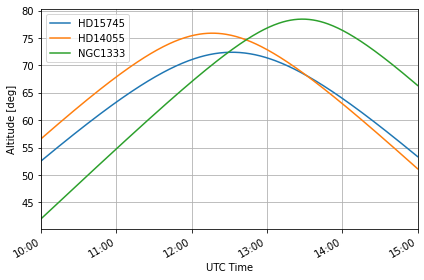

In [5]:
keck = Observer.at_site("Keck")
# Example science target with polarized and unpolarized standard

science_target = "HD15745"
unpol_standard = "HD14055"
pol_standard = "NGC1333"

# List of targets
targets = [science_target, unpol_standard, pol_standard]

# Start and end observation times in UTC
start_time = "2023-09-27 10:00:00" 
end_time = "2023-09-27 15:00:00" 

# Plot the airmass curves
op.plot_altitude_for_targets(keck.location, targets, start_time, end_time)
